In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

# Working with Spatial Data and Network Analysis
*Reading, exploring and analyzing, feature extraction*

**Table of Contents**
* Geospatial data
    * Reading and exploring
    * Projections
    * Visualization
        - Scatter plots
        - Choropleth maps
* Network analysis
    * Graphs, types of graphs
    * Shortest path between nodes
    * Centrality
    * Communities
    

## Geospatial Data 
*Exploring, analyzing and visualizing*

* Data that has a geographic component to it
    * Most commonly: coordinates (latitude, longitude)  → **Geocoding** ↔ Turns adress data into coordinates values
    * Sometimes: country, city, ZIP code, address
    * Not necessarily on Earth ([Google Mars](https://www.google.com/mars/))
* Sources
    * Satellite images
    * GPS data
    * Geotagging (e.g., photos at Facebook)
    * Manual entry, etc.
* Working with spatial data isn't trivial…
    * E.g., we need geometry on a sphere to calculate distances
    * … but we have libraries that make our lives easier

**Geocoding** → Turns adress data into coordinates values. For example, the adress of SoftwareUniversity in Bulgaria is 
Aleksandar Malinov Boulevard 78, eт. 1, 1799 American college, Sofia, Bulgaria  →  coordinates values (42.63622531723286, 23.369816505786)

**Reverse Geocoding** → The process of converting a location as described by geographic coordinates (latitude, longitude) to a human-readable address or place name.

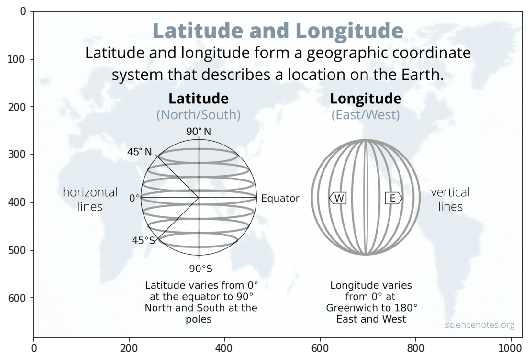

In [3]:
geo_lat = plt.imread("https://sciencenotes.org/wp-content/uploads/2022/06/Latitude-and-Longitude-1024x683.png")
plt.figure(figsize=(10,6))
plt.imshow(geo_lat)
plt.show()

The **latitude** sign is fi ($\varphi$) nad starts from the Equator where its value is 0 degrees. In the North is +90 degrees and in the South is -90 degrees.

The longitude is represented by lambda ($\lambda$). It´s measured from East and West and starts from the cero Meridian wich is the Greenwich Meridian.


### Reading and Exploring Geospatial Data
* In some cases, we have convenient datasets

* In other cases, it's in specific formats
    * GeoJSON, Shapefile, KML, etc.
    * Some libraries (like geopandas) can read these automatically

* Data cleaning
    * Non-spatial columns: proceed as usual
        - Tidy up the data, impute or remove missing values, explore outliers, normalize columns, etc.
    * Spatial columns: fixing or changing coordinates is easier when you visualize them

* Exploratory data analysis
    * Most commonly: look for clusters and other patterns
    * Also: compare attributes across different regions E.g., income by country


###  Plotting Data on a Map
* To plot data, we'll use the **geopandas package**.
    * conda install -c conda forge geopandas
    * conda install -c conda forge geodatasets

* Setting up and displaying a world map
    * land = gpd.read_file (geodatasets.data.naturalearth.land.url)
    * land.plot(figsize = (20, 10), color = "coral", facecolor = "aqua")
    * plt.gca().set_facecolor ("aqua")
    * plt.show()

* Projections ([docs](https://geopandas.org/en/stable/docs/user_guide/projections.html) , [EPSG](https://epsg.io/))
    * Different ways to show a sphere in a 2D plane
    * **Every projection has distortions**
    

#### Example: Earthquake Data
* Dataset: earthquakes.csv , [info](https://www.kaggle.com/datasets/usgs/earthquake-database)
    * Read the dataset, look at missing values
    * Leave only columns you're interested in 
        - ["Date", "Time", "Latitude", "Longitude", "Magnitude", "Depth"]
        
* Explore the dataset
    * Examples: how is the magnitude distributed? When and where did the most powerful earthquakes happen? What are the recent ones?
    
* Perform additional data cleaning, exploration and visualization of the non spatial columns

* Fix dates (remove invalid date format, convert to datetime
    * dt_info = earthquake_data.Date + " " + earthquake_data.Time
    * earthquake_data = earthquake_data.drop(index = dt_info[dt_info.str.len() > 20 ].index)
    * earthquake_data["Data Time"] = pd.to_datatime(earthquake_data.Date + " " + "+ earthquake_data.Time)

In [4]:
earthquake_data = pd.read_csv("Materials/earthquakes.csv")

In [5]:
earthquake_data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [6]:
earthquake_data.shape

(23412, 21)

In [7]:
earthquake_data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [8]:
# A little parenthesis
earthquake_data["Magnitude Type"].astype("category")

0         MW
1         MW
2         MW
3         MW
4         MW
        ... 
23407     ML
23408     ML
23409    MWW
23410    MWW
23411     MB
Name: Magnitude Type, Length: 23412, dtype: category
Categories (10, object): ['MB', 'MD', 'MH', 'ML', ..., 'MWB', 'MWC', 'MWR', 'MWW']

In [9]:
earthquake_data["Magnitude Type"].astype("category").dtype

CategoricalDtype(categories=['MB', 'MD', 'MH', 'ML', 'MS', 'MW', 'MWB', 'MWC', 'MWR',
                  'MWW'],
                 ordered=False)

As we can see it´s converted in CategoricalDtype. This is saving the data with numbers and not with strings. This is used to save memory if the strings are long.

Now as always, we can do a little bit of exploration.

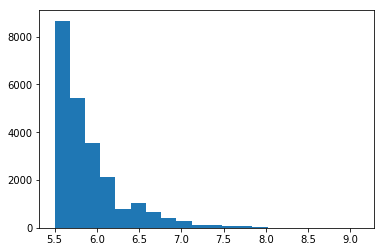

In [10]:
plt.hist(earthquake_data.Magnitude, bins = 20)
plt.show()

In [11]:
#show the top 5 magnitude Earthquakes
earthquake_data.nlargest(5, "Magnitude")

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
17083,12/26/2004,00:58:53,3.295,95.982,Earthquake,30.0,NaN,601.0,9.1,MW,...,NaN,22.0,NaN,NaN,1.17,OFFICIAL20041226005853450_30,OFFICIAL,US,OFFICIAL,Reviewed
20501,03/11/2011,05:46:24,38.297,142.373,Earthquake,29.0,NaN,541.0,9.1,MWW,...,NaN,9.5,NaN,NaN,1.16,OFFICIAL20110311054624120_30,OFFICIAL,US,OFFICIAL,Reviewed
19928,02/27/2010,06:34:12,-36.122,-72.898,Earthquake,22.9,9.2,454.0,8.8,MWW,...,NaN,17.8,NaN,NaN,1.09,OFFICIAL20100227063411530_30,OFFICIAL,US,OFFICIAL,Reviewed
16,02/04/1965,05:01:22,51.251,178.715,Earthquake,30.3,NaN,NaN,8.7,MW,...,NaN,NaN,NaN,NaN,NaN,OFFICIAL19650204050122_30,OFFICIAL,ISCGEM,OFFICIAL,Automatic
17329,03/28/2005,16:09:37,2.085,97.108,Earthquake,30.0,NaN,510.0,8.6,MWW,...,NaN,22.1,NaN,NaN,0.91,OFFICIAL20050328160936530_30,OFFICIAL,US,OFFICIAL,Reviewed


In [12]:
# rename Pandas columns to lower case
earthquake_data.columns = earthquake_data.columns.str.lower()
earthquake_data.columns

Index(['date', 'time', 'latitude', 'longitude', 'type', 'depth', 'depth error',
       'depth seismic stations', 'magnitude', 'magnitude type',
       'magnitude error', 'magnitude seismic stations', 'azimuthal gap',
       'horizontal distance', 'horizontal error', 'root mean square', 'id',
       'source', 'location source', 'magnitude source', 'status'],
      dtype='object')

In [13]:
#replace white space everywhere
earthquake_data.columns = earthquake_data.columns.str.replace(' ', '_')
earthquake_data.columns

Index(['date', 'time', 'latitude', 'longitude', 'type', 'depth', 'depth_error',
       'depth_seismic_stations', 'magnitude', 'magnitude_type',
       'magnitude_error', 'magnitude_seismic_stations', 'azimuthal_gap',
       'horizontal_distance', 'horizontal_error', 'root_mean_square', 'id',
       'source', 'location_source', 'magnitude_source', 'status'],
      dtype='object')

In [14]:
#select only columns that I´m interested in
earthquake_dataset = earthquake_data[["date", "time", "latitude", "longitude", "magnitude", "depth"]]
earthquake_dataset

,date,time,latitude,longitude,magnitude,depth
0,01/02/1965,13:44:18,19.2460,145.6160,6.0,131.60
1,01/04/1965,11:29:49,1.8630,127.3520,5.8,80.00
2,01/05/1965,18:05:58,-20.5790,-173.9720,6.2,20.00
3,01/08/1965,18:49:43,-59.0760,-23.5570,5.8,15.00
4,01/09/1965,13:32:50,11.9380,126.4270,5.8,15.00
...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,5.6,12.30
23408,12/28/2016,09:13:47,38.3777,-118.8957,5.5,8.80
23409,12/28/2016,12:38:51,36.9179,140.4262,5.9,10.00
23410,12/29/2016,22:30:19,-9.0283,118.6639,6.3,79.00


In [15]:
# Fix dates (remove invalid date format, convert to datetime)
dt_info = earthquake_dataset.date + " " + earthquake_dataset.time

In [16]:
dt_info.str.len().sort_values(ascending = False)

7512     49
3378     49
20650    49
23411    19
7798     19
         ..
15609    19
15610    19
15611    19
15612    19
0        19
Length: 23412, dtype: int64

In [17]:
#as we can see we have 3 rows with different values that will raise an error. So the easies way is to delete them.
index = dt_info[dt_info.str.len() > 20 ].index

earthquake_dataset = earthquake_dataset.drop(index)

In [18]:
earthquake_dataset["datatime"] = pd.to_datetime(earthquake_dataset.date + " " + earthquake_dataset.time)

In [19]:
earthquake_dataset

,date,time,latitude,longitude,magnitude,depth,datatime
0,01/02/1965,13:44:18,19.2460,145.6160,6.0,131.60,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.8630,127.3520,5.8,80.00,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.5790,-173.9720,6.2,20.00,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.0760,-23.5570,5.8,15.00,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.9380,126.4270,5.8,15.00,1965-01-09 13:32:50
...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,5.6,12.30,2016-12-28 08:22:12
23408,12/28/2016,09:13:47,38.3777,-118.8957,5.5,8.80,2016-12-28 09:13:47
23409,12/28/2016,12:38:51,36.9179,140.4262,5.9,10.00,2016-12-28 12:38:51
23410,12/29/2016,22:30:19,-9.0283,118.6639,6.3,79.00,2016-12-29 22:30:19


In [20]:
earthquake_dataset.drop(columns = ["date", "time"])

,latitude,longitude,magnitude,depth,datatime
0,19.2460,145.6160,6.0,131.60,1965-01-02 13:44:18
1,1.8630,127.3520,5.8,80.00,1965-01-04 11:29:49
2,-20.5790,-173.9720,6.2,20.00,1965-01-05 18:05:58
3,-59.0760,-23.5570,5.8,15.00,1965-01-08 18:49:43
4,11.9380,126.4270,5.8,15.00,1965-01-09 13:32:50
...,...,...,...,...,...
23407,38.3917,-118.8941,5.6,12.30,2016-12-28 08:22:12
23408,38.3777,-118.8957,5.5,8.80,2016-12-28 09:13:47
23409,36.9179,140.4262,5.9,10.00,2016-12-28 12:38:51
23410,-9.0283,118.6639,6.3,79.00,2016-12-29 22:30:19


In [21]:
earthquakes_by_year = earthquake_dataset.groupby(earthquake_dataset.datatime.dt.year).size()

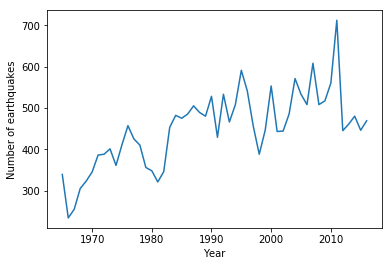

In [22]:
plt.plot(earthquakes_by_year)
plt.xlabel("Year")
plt.ylabel("Number of earthquakes")
plt.show()

### Plotting Data on a Map
* To plot data, we'll use the geopandas package
    * conda install -c conda-forge geopandas
    * conda install -c conda forge geodatasets


* Setting up and displaying a world map
    * land = gpd.read_file (geodatasets.data.naturalearth.land.url)
    * land.plot(figsize = (20, 10), color = "coral", facecolor = "aqua")
    * plt.gca().set_facecolor ("aqua")
    * plt.show()


* Projections ([docs](https://geopandas.org/en/stable/docs/user_guide/projections.html) , [EPSG](https://epsg.io/))
    * Different ways to show a sphere in a 2D plane
    * **Every projection has distortions**
    

* Data (features)
    * Use as common pandas columns Series
    
    
* Selection, projection, grouping, etc.
    * Work as expected
    
    
* Geometry
    * Points, lines, polygons
    * [Quick guide](https://geopandas.org/en/stable/docs/user_guide/data_structures.html)
    * Contains useful nfo and methods, such as area, bounds, centroids and distances
    * Allows for every easy plotting


* Using / changing projections 
    * dataframe.to_crs(name)
    * Commonly used with EPSG (4326 by default)